In [96]:
! pip install --upgrade -q matplotlib
! pip install --upgrade -q plotly

In [97]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import datetime
import numpy as np
from datetime import datetime
import plotly.express as px
from pandas import option_context

**Name:** _Marcel Damas_   
**E-Mail:** _marcel-spanien@hotmail.de_  
<a name="table_of_contents"></a> 
 
 
**Table of contents**  


**Project Description** 

You work at a startup that sells food products. You need to investigate user behavior for the company's app.
First study the sales funnel. Find out how users reach the purchase stage. How many users actually make it to this stage? How many get stuck at previous stages? Which stages in particular?
Then look at the results of an A/A/B test. (Read on for more information about A/A/B testing.) The designers would like to change the fonts for the entire app, but the managers are afraid the users might find the new design intimidating. They decide to make a decision based on the results of an A/A/B test.
The users are split into three groups: two control groups get the old fonts and one test group gets the new ones. Find out which set of fonts produces better results.
Creating two A groups has certain advantages. We can make it a principle that we will only be confident in the accuracy of our testing when the two control groups are similar. If there are significant differences between the A groups, this can help us uncover factors that may be distorting the results. Comparing control groups also tells us how much time and data we'll need when running further tests.
You'll be using the same dataset for general analytics and for A/A/B analysis. In real projects, experiments are constantly being conducted. Analysts study the quality of an app using general data, without paying attention to whether users are participating in experiments.  

**Project goal**   

Our goal is to analyze the users and to find out how the users react and where we are losing users and looking for problems to find out what we need to work on to improve our product to achieve more success with our product.  

**Description of the data**

Each log entry is a user action or an event.
    • EventName — event name  
    • DeviceIDHash — unique user identifier  
    • EventTimestamp — event time  
    • ExpId — experiment number: 246 and 247 are the control groups, 248 is the test group  
    
**Instructions for completing the project**  

**Step 1. Open the data file and read the general information**  

File path: /datasets/logs_exp_us.csv Download dataset  

**Step 2. Prepare the data for analysis**

   • Rename the columns in a way that's convenient for you  [click here](#Step_2.1)    
   • Check for missing values and data types. Correct the data if needed[click here](#Step_2.2)       
   • Add a date and time column and a separate column for dates[click here](#Step_2.3)      

**Step 3. Study and check the data**  

   • How many events are in the logs?  [click here](#Step_3.1)    
   • How many users are in the logs?  [click here](#Step_3.2)    
   • What's the average number of events per user? [click here](#Step_3.4) 
   • What period of time does the data cover? Find the maximum and the minimum date. Plot a histogram by date and time. Can you be sure that you have equally complete data for the entire period? Older events could end up in some users' logs for technical reasons, and this could skew the overall picture. Find the moment at which the data starts to be complete and ignore the earlier section. What period does the data actually represent? [click here](#Step_3.4)    
   • Did you lose many events and users when excluding the older data?  [click here](#Step_3.5)     
   • Make sure you have users from all three experimental groups. [click here](#Step_3.6)     

**Step 4. Study the event funnel**  

   • See what events are in the logs and their frequency of occurrence. Sort them by frequency. [click here](#Step_4.1)    
   • Find the number of users who performed each of these actions. Sort the events by the number of users. Calculate the proportion of users who performed the action at least once. [click here](#Step_4.2)    
   • In what order do you think the actions took place. Are all of them part of a single sequence? You don't need to take them into account when calculating the funnel.  [click here](#Step_4.3)   
   • Use the event funnel to find the share of users that proceed from each stage to the next. (For instance, for the sequence of events A → B → C, calculate the ratio of users at stage B to the number of users at stage A and the ratio of users at stage C to the number at stage B.)  [click here](#Step_4.4)  
   • At what stage do you lose the most users?  [click here](#Step_4.5)  
   • What share of users make the entire journey from their first event to payment?  [click here](#Step_4.6)  
   
**Step 5. Study the results of the experiment**  

   • How many users are there in each group? [click here](#Step_5.1)   
   • We have two control groups in the A/A test, where we check our mechanisms and calculations. See if there is a statistically significant difference between samples 246 and 247. [click here](#Step_5.2)    
   • Select the most popular event. In each of the control groups, find the number of users who performed this action. Find their share. Check whether the difference between the groups is statistically significant. Repeat the procedure for all other events (it will save time if you create a special function for this test). Can you confirm that the groups were split properly? [click here](#Step_5.3)    
   • Do the same thing for the group with altered fonts. Compare the results with those of each of the control groups for each event in isolation. Compare the results with the combined results for the control groups. What conclusions can you draw from the experiment? [click here](#Step_5.4)    
   • What significance level have you set to test the statistical hypotheses mentioned above? Calculate how many statistical hypothesis tests you carried out. With a statistical significance level of 0.1, one in 10 results could be false. What should the significance level be? If you want to change it, run through the previous steps again and check your conclusions. [click here](#Step_5.5)    

**Step 1. Open the data file and read the general information**  

File path: /datasets/logs_exp_us.csv Download dataset  

In [98]:
try:
    data = pd.read_csv('logs_exp_us.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


<a name="Step_2.1"></a>
**Step 2. Prepare the data for analysis**  

   • Rename the columns in a way that's convenient for you  
   
   Back to the table of contents [click here](#table_of_contents)   

In [100]:
data.columns =['event_name','user_id','timestamp','experiment_id']
data.head()

,event_name,user_id,timestamp,experiment_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


<a name="Step_2.2"></a>
**Step 2. Prepare the data for analysis**

   • Check for missing values and data types. Correct the data if needed    
   
   Back to the table of contents [click here](#table_of_contents)   

In [101]:
data.isnull().sum()

event_name       0
user_id          0
timestamp        0
experiment_id    0
dtype: int64

In [102]:
data.duplicated().sum()

413

In [103]:
data.drop_duplicates(keep="first",inplace=True)

In [104]:
data.duplicated().sum()

0

<a name="Step_2.3"></a>
**Step 2. Prepare the data for analysis**

   • Add a date and time column and a separate column for dates  
   
 Back to the table of contents [click here](#table_of_contents)   

In [105]:
data['timestamp'] = data['timestamp'].apply(lambda x: datetime.fromtimestamp(x))
data.head()

,event_name,user_id,timestamp,experiment_id
0,MainScreenAppear,4575588528974610257,2019-07-25 06:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 13:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 13:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 13:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 13:48:42,248


In [106]:
data['day_of_week']=data['timestamp'].dt.day_name()
data.sample(5)

,event_name,user_id,timestamp,experiment_id,day_of_week
227339,OffersScreenAppear,5935355123741815286,2019-08-07 14:27:26,247,Wednesday
219012,MainScreenAppear,1668146608972887617,2019-08-07 09:42:29,247,Wednesday
133992,MainScreenAppear,7196016872209902268,2019-08-04 19:07:52,246,Sunday
71916,CartScreenAppear,4623191541214045580,2019-08-02 21:50:49,247,Friday
186745,CartScreenAppear,4488981949755449740,2019-08-06 10:59:14,248,Tuesday


<a name="Step_3.1"></a>
**Step 3. Study and check the data**  

   • How many events are in the logs?  
 
 Back to the table of contents [click here](#table_of_contents)

In [107]:
data['event_name'].value_counts()

MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event_name, dtype: int64

In [108]:
data['event_name'].count()

243713

**Conclusion**  

There are 5 different events with a different number in the logs. MainScreenAppear with 119205 logs is the one with the most and Tutorial with 1052 the one with the fewest. In total we have 244126 logs. 

<a name="Step_3.2"></a>
**Step 3. Study and check the data**  
    
   • How many users are in the logs?      

 Back to the table of contents [click here](#table_of_contents)

In [109]:
data['user_id'].value_counts()

6304868067479728361    2307
197027893265565660     1998
4623191541214045580    1768
6932517045703054087    1439
1754140665440434215    1221
                       ... 
6888746892508752          1
6671109879025379318       1
1223708690315846789       1
5229230634268921313       1
2408195006658927235       1
Name: user_id, Length: 7551, dtype: int64

In [110]:
data['user_id'].nunique()

7551

**Conclusion** 

we have a total of 7551 different users which are represented differently. The user number 6304868067479728361 is represented by 2308 but there are also some that only exist once. 

<a name="Step_3.3"></a>
**Step 3. Study and check the data**  
   
   • What's the average number of events per user?    
 
  Back to the table of contents [click here](#table_of_contents)

In [111]:
data['experiment_id'].value_counts()

248    85582
246    80181
247    77950
Name: experiment_id, dtype: int64

There are 3 different experiments. 

In [112]:
data[data['experiment_id']==246]['user_id'].nunique()

2489

Number of users in the first group 246 is 2489.

In [113]:
data[data['experiment_id']==247]['user_id'].nunique()

2520

Number of users in the second group 247 is 2520.

In [114]:
data[data['experiment_id']==248]['user_id'].nunique()

2542

Number of users in the third group 248 is 2542.

**Conclusion**

In the experimental group 1 the fewest users are altogether 2489. In the 3 group there are the most with altogether 2542. 

<a name="Step_3.4"></a>
**Step 3. Study and check the data**  

   • What period of time does the data cover? Find the maximum and the minimum date. Plot a histogram by date and time. Can you be sure that you have equally complete data for the entire period? Older events could end up in some users' logs for technical reasons, and this could skew the overall picture. Find the moment at which the data starts to be complete and ignore the earlier section. What period does the data actually represent? 
   
   Back to the table of contents [click here](#table_of_contents)

In [115]:
print('The maximum date:',data['timestamp'].max())

The maximum date: 2019-08-07 23:15:17


In [116]:
print('The minimum date:',data['timestamp'].min())

The minimum date: 2019-07-25 06:43:36


In [117]:
data['timestamp'].max()-data['timestamp'].min()

Timedelta('13 days 16:31:41')

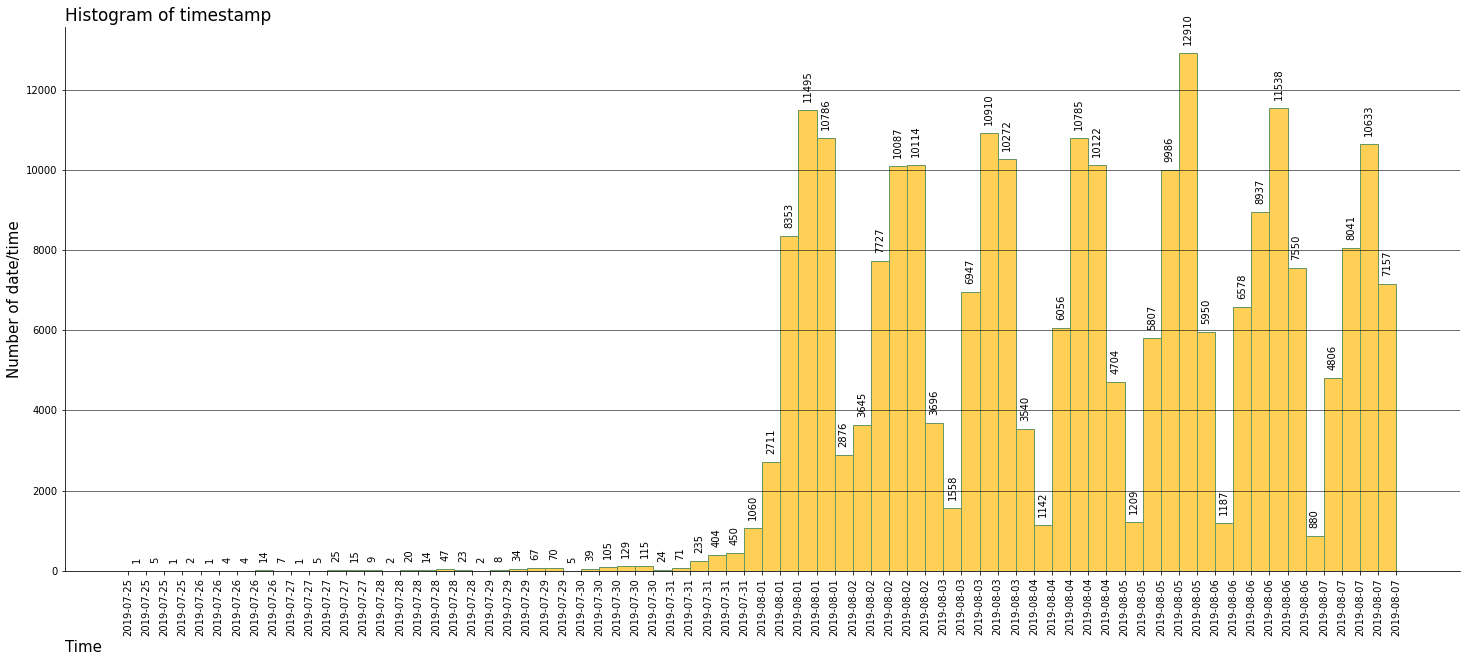

In [118]:
fig, ax = plt.subplots(1, figsize=(25,10))

n, bins ,patches=plt.hist(data['timestamp'], bins=70,color='#FFCF56',edgecolor='#6A9662')#,density=True

plt.title("Histogram of timestamp",fontdict={'size':17},loc='left')

plt.xlabel("Time",fontdict={'size':15},loc='left')
plt.xticks(bins,size=10, rotation=90)

plt.ylabel("Number of date/time",fontdict={'size':15})
plt.yticks(size=10)

plt.grid(axis='y', color='black', lw = 0.8, alpha=0.7)
plt.grid(which='minor',color='white', lw=0.5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for bar in patches:
    plt.annotate(text=format(bar.get_height(), '.0f'), 
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 rotation=90,
                 ha='center', va='bottom',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')
plt.show()

**Conclusion** 

As the histogram looks like, we can assume that all data before 08/01/2019 are incomplete only then can we see a clear structure in the data. 

In [119]:
df_filt=data[data['timestamp']>='2019-08-01']

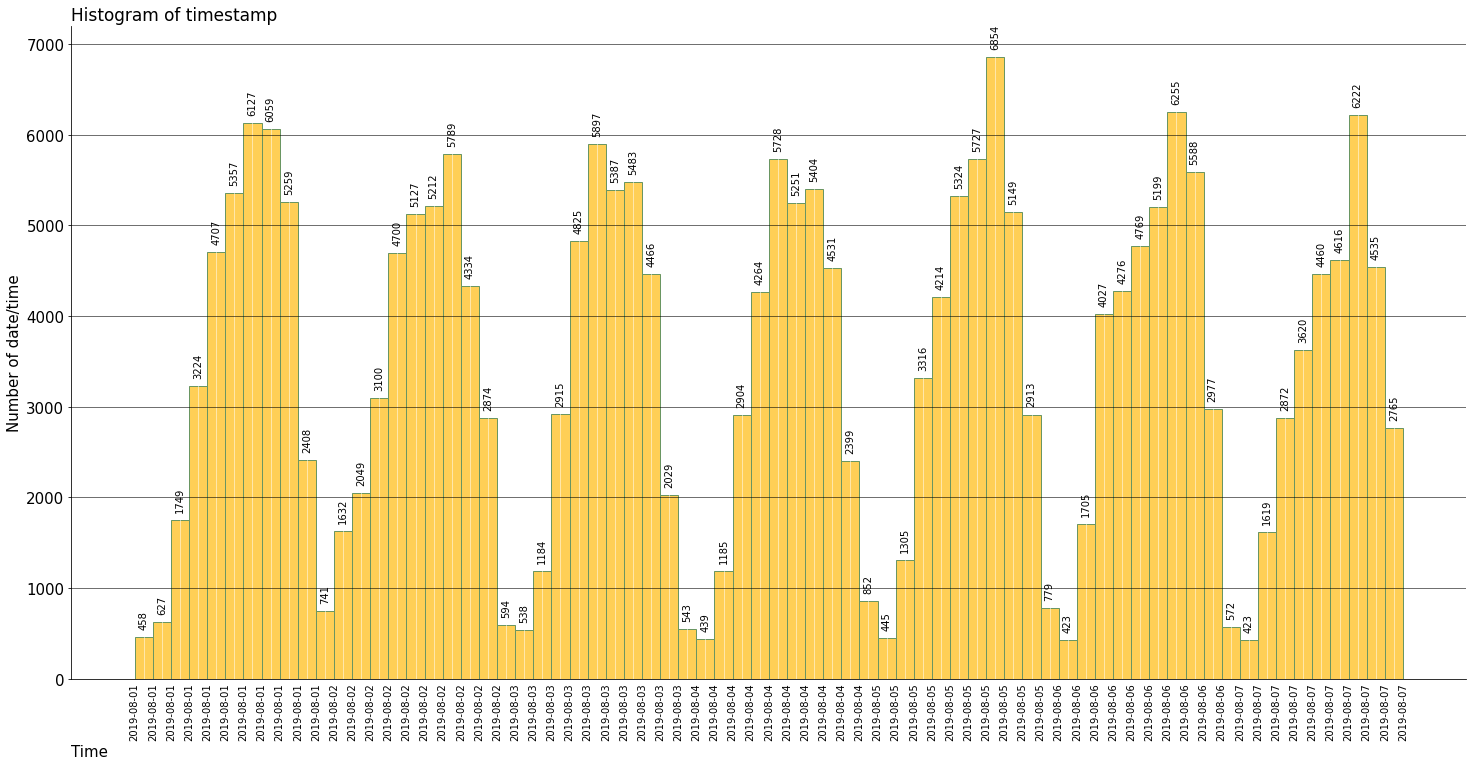

In [120]:
fig, ax = plt.subplots(1, figsize=(25,12))

n,bins ,patches=plt.hist(df_filt['timestamp'], bins=70,color='#FFCF56',edgecolor='#6A9662')#,density=True
plt.plot(label='B')
plt.title("Histogram of timestamp",fontdict={'size':17},loc='left')
plt.xlabel("Time",fontdict={'size':15},loc='left')
plt.xticks(bins,size=10)
plt.ylabel("Number of date/time",fontdict={'size':15})
plt.rc("font", size=15)
plt.xticks(rotation=90)
minor_locator=AutoMinorLocator(2)
plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor',color='white', lw=0.5)
xticks=[(bins[idx+1] + value)/2 for idx,value in enumerate(bins[:1])]
xticks_labels=["{:.2f}\nto\n{:.2f}".format(value,bins[idx+1]) for idx, value in enumerate(bins[:-1])]
ax.tick_params(axis='x', which='both',length=0)

plt.grid(axis='y', color='black', lw = 0.8, alpha=0.7)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for bar in patches:
    plt.annotate(text=format(bar.get_height(), '.0f'), 
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 rotation=90,
                 ha='center', va='bottom',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')

plt.show()

<a name="Step_3.5"></a>
**Step 3. Study and check the data**  
 
   • Did you lose many events and users when excluding the older data?  
   
  Back to the table of contents [click here](#table_of_contents)

In [121]:
print('From',data['event_name'].count(),'we lost',data['user_id'].count()-df_filt['user_id'].count(),
      'users and lost',data['event_name'].count()-df_filt['event_name'].count(),'events to now a total of',
      df_filt['event_name'].count(),'.')
print('In percent this corresponds to a data loss of',100/data['event_name'].count()*(data['user_id'].count()-df_filt['user_id'].count()),'%')

From 243713 we lost 2413 users and lost 2413 events to now a total of 241300 .
In percent this corresponds to a data loss of 0.9900990099009902 %


**Conclusion**

Since we filtered out the data for half of the total of 14 days, we only lost a small amount of data. From 243713 we lost 2826 this corresponds to a loss of 1.16% of our data to 98.84% from our 100% now I think that is reasonable.

<a name="Step_3.6"></a>
**Step 3. Study and check the data**  
    
   • Make sure you have users from all three experimental groups. 
   
  Back to the table of contents [click here](#table_of_contents)

In [122]:
print('before',data[data['experiment_id']==246]['user_id'].nunique())
print('afterwards',df_filt[df_filt['experiment_id']==246]['user_id'].nunique())

before 2489
afterwards 2484


In [123]:
print('before',data[data['experiment_id']==247]['user_id'].nunique())
print('afterwards',df_filt[df_filt['experiment_id']==247]['user_id'].nunique())

before 2520
afterwards 2517


In [124]:
print('before',data[data['experiment_id']==247]['user_id'].nunique())
print('afterwards',df_filt[df_filt['experiment_id']==248]['user_id'].nunique())

before 2520
afterwards 2537


**Conclusion** 

We have also lost data here but still sufficient data.

<a name="Step_4.1"></a>
**Step 4. Study the event funnel**  

   • See what events are in the logs and their frequency of occurrence. Sort them by frequency.
   
 Back to the table of contents [click here](#table_of_contents)

In [125]:
df_filt.groupby('event_name').agg({'user_id': 'count'}).sort_values(by='user_id', ascending=False)

,user_id
event_name,
MainScreenAppear,117617
OffersScreenAppear,46420
CartScreenAppear,42322
PaymentScreenSuccessful,33935
Tutorial,1006


**Conclusion** 

That the Main Screen Appear event occurs most frequently with 117720 and the tutorial occurs with 1040 the least often. 

<a name="Step_4.2"></a>
**Step 4. Study the event funnel**  
   
   • Find the number of users who performed each of these actions. Sort the events by the number of users. Calculate the proportion of users who performed the action at least once. 
   
   Back to the table of contents [click here](#table_of_contents)

In [126]:
df_pivot = df_filt.pivot_table(index='event_name', values='user_id', columns='experiment_id', aggfunc=lambda x: x.nunique()).reset_index()
df_pivot

experiment_id,event_name,246,247,248
0,CartScreenAppear,1266,1239,1230
1,MainScreenAppear,2450,2479,2494
2,OffersScreenAppear,1542,1522,1531
3,PaymentScreenSuccessful,1200,1158,1181
4,Tutorial,278,283,280


In [127]:
print('The number of users who performed each of these actions is:',df_filt['user_id'].nunique())

The number of users who performed each of these actions is: 7538


In [128]:
users = df_filt.pivot_table(index='user_id',columns='event_name',values='timestamp',aggfunc='min')
users

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
user_id,,,,,
6888746892508752,NaT,2019-08-06 16:06:34,NaT,NaT,NaT
6909561520679493,2019-08-06 20:52:58,2019-08-06 20:52:54,2019-08-06 20:53:04,2019-08-06 20:52:58,NaT
6922444491712477,2019-08-04 16:19:40,2019-08-04 16:19:33,2019-08-04 16:19:46,2019-08-04 16:19:40,NaT
7435777799948366,NaT,2019-08-05 10:06:34,NaT,NaT,NaT
7702139951469979,2019-08-02 16:28:45,2019-08-01 06:29:54,2019-08-01 06:29:56,2019-08-02 16:28:45,NaT
...,...,...,...,...,...
9217594193087726423,2019-08-02 11:00:58,NaT,2019-08-02 11:01:08,2019-08-02 11:00:57,NaT
9219463515465815368,2019-08-06 18:49:40,2019-08-05 07:26:26,2019-08-06 18:48:57,2019-08-06 18:52:16,NaT
9220879493065341500,2019-08-02 19:59:16,2019-08-02 19:58:48,2019-08-02 19:59:00,NaT,NaT


In [129]:
print('Number of users at CartScreenAppear',users[~users['CartScreenAppear'].isna()].shape[0])

Number of users at CartScreenAppear 3735


In [130]:
print('Number of users at MainScreenAppear',users[~users['MainScreenAppear'].isna()].shape[0])

Number of users at MainScreenAppear 7423


In [131]:
print('Number of users at OffersScreenAppear',users[~users['OffersScreenAppear'].isna()].shape[0])

Number of users at OffersScreenAppear 4595


In [132]:
print('Number of users at PaymentScreenSuccessful',users[~users['PaymentScreenSuccessful'].isna()].shape[0])

Number of users at PaymentScreenSuccessful 3539


**Conclusion**  

If we add them together we get 19292 attended events since some of the 7538 users visited several events. 

<a name="Step_4.3"></a>
**Step 4. Study the event funnel**  

   • In what order do you think the actions took place. Are all of them part of a single sequence? You don't need to take them into account when calculating the funnel. 
   
   Back to the table of contents [click here](#table_of_contents)

In [133]:
print(users['CartScreenAppear'].min())
users['CartScreenAppear'].max()-users['CartScreenAppear'].min()

2019-08-01 00:01:39


Timedelta('6 days 22:42:50')

With the CartScreenAppear we have the first date on 2019-08-01 and then data for a further 6 days. 

In [134]:
print(users['MainScreenAppear'].min())
users['MainScreenAppear'].max()-users['MainScreenAppear'].min()

2019-08-01 00:00:12


Timedelta('6 days 22:43:18')

With the MainScreenAppear we have the first date on 2019-08-01 and then data for a further 6 days. 

In [135]:
print(users['OffersScreenAppear'].min())
users['OffersScreenAppear'].max()-users['OffersScreenAppear'].min()

2019-08-01 00:00:17


Timedelta('6 days 23:02:46')

With the OffersScreenAppear we have the first date on 2019-08-01 and then data for a further 6 days. 

In [136]:
print(users['PaymentScreenSuccessful'].min())
users['PaymentScreenSuccessful'].max()-users['PaymentScreenSuccessful'].min()

2019-08-01 00:01:38


Timedelta('6 days 22:39:58')

With the PaymentScreenSuccessful we also have the first date on 2019-08-01 and then data for a further 6 days

In [137]:
print(users['Tutorial'].min())
users['Tutorial'].max()-users['Tutorial'].min()

2019-08-01 01:34:18


Timedelta('6 days 20:49:34')

With the Tutorial we also have the first date on 2019-08-01 and then data for a further 6 days. So it looks like these actions have taken place consistently and there is no order.They don't seem to have a single sequence either, since there are rush hours and times when it is less busy. It seems to be a continuous process that has been going on for a long time.

In [138]:
df_filt

,event_name,user_id,timestamp,experiment_id,day_of_week
2415,MainScreenAppear,3957232200565023322,2019-08-01 00:00:12,246,Thursday
2416,OffersScreenAppear,3957232200565023322,2019-08-01 00:00:17,246,Thursday
2417,MainScreenAppear,4933689529142781210,2019-08-01 00:00:29,246,Thursday
2418,MainScreenAppear,1802682376349807053,2019-08-01 00:00:33,248,Thursday
2419,MainScreenAppear,2011152258955517776,2019-08-01 00:00:42,247,Thursday
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 23:12:25,247,Wednesday
244122,MainScreenAppear,5849806612437486590,2019-08-07 23:13:59,246,Wednesday
244123,MainScreenAppear,5746969938801999050,2019-08-07 23:14:43,246,Wednesday
244124,MainScreenAppear,5746969938801999050,2019-08-07 23:14:58,246,Wednesday


In [139]:
sorted_data=df_filt[df_filt['event_name']!='Tutorial'].sort_values(by=['user_id','timestamp'])
sorted_data.sample()

,event_name,user_id,timestamp,experiment_id,day_of_week
82802,OffersScreenAppear,1968327796343926941,2019-08-03 11:07:30,248,Saturday


we take an example visitor and look at the order in which the events go through 

In [140]:
sorted_data[sorted_data.user_id==3847488767744805011]

,event_name,user_id,timestamp,experiment_id,day_of_week
27095,MainScreenAppear,3847488767744805011,2019-08-01 17:44:28,247,Thursday
27101,PaymentScreenSuccessful,3847488767744805011,2019-08-01 17:44:31,247,Thursday
27102,CartScreenAppear,3847488767744805011,2019-08-01 17:44:31,247,Thursday
27103,MainScreenAppear,3847488767744805011,2019-08-01 17:44:31,247,Thursday
27110,OffersScreenAppear,3847488767744805011,2019-08-01 17:44:38,247,Thursday
27114,CartScreenAppear,3847488767744805011,2019-08-01 17:44:41,247,Thursday
40956,MainScreenAppear,3847488767744805011,2019-08-02 04:46:18,247,Friday
40957,OffersScreenAppear,3847488767744805011,2019-08-02 04:46:20,247,Friday
40963,CartScreenAppear,3847488767744805011,2019-08-02 04:47:18,247,Friday
65297,MainScreenAppear,3847488767744805011,2019-08-02 18:20:01,247,Friday


In [141]:
def sequence(user):
    sorted_user=sorted_data[sorted_data['user_id']==user].sort_values(by=['user_id','timestamp'])
    return sorted_user['event_name'].drop_duplicates().to_list()

For the example user 3847488767744805011 there was this sequence 1 'MainScreenAppear', 2 'PaymentScreenSuccessful', 3 'CartScreenAppear',4 'OffersScreenAppear' 

In [142]:
sequence(3847488767744805011)

['MainScreenAppear',
 'PaymentScreenSuccessful',
 'CartScreenAppear',
 'OffersScreenAppear']

In [143]:
#from pandas import option_context
# isolate my code from other parts of your project
example_df = df_filt.copy() 
# We will group event sequence with hour precision
example_df['event_time_hour'] = example_df['timestamp'].dt.strftime('%Y-%m-%d %H')
# Order events
example_df = example_df.sort_values(by='timestamp')
# Get event sequences for every user and event time with hour precision. 
# We use set instead of the list to remove repeated events
# You can change set to list and you will see the difference
event_orders = example_df.groupby(['user_id', 'event_time_hour']).agg({'event_name':set})

with option_context('display.max_colwidth', 400):
    display(event_orders.head())
    
event_orders['event_name'].value_counts()[:15].to_frame()  

event_name
user_id          event_time_hour                                                                                   
6888746892508752 2019-08-06 16                                                                   {MainScreenAppear}
6909561520679493 2019-08-06 20    {PaymentScreenSuccessful, MainScreenAppear, CartScreenAppear, OffersScreenAppear}
6922444491712477 2019-08-04 16    {PaymentScreenSuccessful, MainScreenAppear, CartScreenAppear, OffersScreenAppear}
                 2019-08-04 19    {PaymentScreenSuccessful, MainScreenAppear, CartScreenAppear, OffersScreenAppear}
                 2019-08-05 15                                               {MainScreenAppear, OffersScreenAppear}

,event_name
{MainScreenAppear},21574
"{PaymentScreenSuccessful, MainScreenAppear, CartScreenAppear, OffersScreenAppear}",9955
"{MainScreenAppear, OffersScreenAppear}",9557
{OffersScreenAppear},2278
"{PaymentScreenSuccessful, CartScreenAppear, OffersScreenAppear}",1750
"{MainScreenAppear, CartScreenAppear, OffersScreenAppear}",871
"{PaymentScreenSuccessful, CartScreenAppear}",494
"{PaymentScreenSuccessful, MainScreenAppear, CartScreenAppear}",362
"{MainScreenAppear, CartScreenAppear}",353
"{MainScreenAppear, Tutorial}",276


So, now we can see that users can randomly switch between stages and we need to select the main funnel scenario based on logic, rather than the most popular pattern.

To see for each user in general which way he has taken

<a name="Step_4.4"></a>
**Step 4. Study the event funnel**  
  
   • Use the event funnel to find the share of users that proceed from each stage to the next. (For instance, for the sequence of events A → B → C, calculate the ratio of users at stage B to the number of users at stage A and the ratio of users at stage C to the number at stage B.)  
   
   Back to the table of contents [click here](#table_of_contents)

In [144]:
users.head()

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
user_id,,,,,
6888746892508752,NaT,2019-08-06 16:06:34,NaT,NaT,NaT
6909561520679493,2019-08-06 20:52:58,2019-08-06 20:52:54,2019-08-06 20:53:04,2019-08-06 20:52:58,NaT
6922444491712477,2019-08-04 16:19:40,2019-08-04 16:19:33,2019-08-04 16:19:46,2019-08-04 16:19:40,NaT
7435777799948366,NaT,2019-08-05 10:06:34,NaT,NaT,NaT
7702139951469979,2019-08-02 16:28:45,2019-08-01 06:29:54,2019-08-01 06:29:56,2019-08-02 16:28:45,NaT


In [145]:
step_1 = ~users['CartScreenAppear'].isna()
step_2 = step_1 & (users['MainScreenAppear'] > users['CartScreenAppear'])
step_3 = step_2 & (users['OffersScreenAppear'] > users['MainScreenAppear'])
step_4 = step_3 & (users['PaymentScreenSuccessful'] > users['OffersScreenAppear'])
step_5 = step_4 & (users['Tutorial'] > users['PaymentScreenSuccessful'])

n_CartScreenAppear = users[step_1].shape[0]
n_MainScreenAppear = users[step_2].shape[0]
n_OffersScreenAppear = users[step_3].shape[0]
n_PaymentScreenSuccessful = users[step_4].shape[0]
n_Tutorial = users[step_5].shape[0]

print('CartScreenAppear:', n_CartScreenAppear)
print('MainScreenAppear:', n_MainScreenAppear)
print('OffersScreenAppear:', n_OffersScreenAppear)
print('PaymentScreenSuccessful:', n_PaymentScreenSuccessful)
print('Tutorial:', n_Tutorial)

CartScreenAppear: 3735
MainScreenAppear: 201
OffersScreenAppear: 45
PaymentScreenSuccessful: 8
Tutorial: 0


Of the 3735 CartScreenAppear visitors only 0 participated in the tutorial. 

In [146]:
funnel_shift=df_filt.groupby(['event_name'])['user_id'].nunique().sort_values(ascending=False).reset_index()
funnel_shift

,event_name,user_id
0,MainScreenAppear,7423
1,OffersScreenAppear,4595
2,CartScreenAppear,3735
3,PaymentScreenSuccessful,3539
4,Tutorial,841


In [147]:
funnel_shift['perc_ch']=funnel_shift['user_id'].pct_change()
funnel_shift

,event_name,user_id,perc_ch
0,MainScreenAppear,7423,NaN
1,OffersScreenAppear,4595,-0.380978
2,CartScreenAppear,3735,-0.187160
3,PaymentScreenSuccessful,3539,-0.052477
4,Tutorial,841,-0.762362


In [148]:
funnel_by_groups=[]
for i in df_filt.experiment_id.unique():
    group=df_filt[df_filt.experiment_id==i].groupby(['event_name','experiment_id'])['user_id'].nunique().reset_index().sort_values(by=['user_id'],ascending=False)
    display(group)
    funnel_by_groups.append(group)

,event_name,experiment_id,user_id
1,MainScreenAppear,246,2450
2,OffersScreenAppear,246,1542
0,CartScreenAppear,246,1266
3,PaymentScreenSuccessful,246,1200
4,Tutorial,246,278


,event_name,experiment_id,user_id
1,MainScreenAppear,248,2494
2,OffersScreenAppear,248,1531
0,CartScreenAppear,248,1230
3,PaymentScreenSuccessful,248,1181
4,Tutorial,248,280


,event_name,experiment_id,user_id
1,MainScreenAppear,247,2479
2,OffersScreenAppear,247,1522
0,CartScreenAppear,247,1239
3,PaymentScreenSuccessful,247,1158
4,Tutorial,247,283


In [149]:
funnel_by_groups=pd.concat(funnel_by_groups)
funnel_by_groups

,event_name,experiment_id,user_id
1,MainScreenAppear,246,2450
2,OffersScreenAppear,246,1542
0,CartScreenAppear,246,1266
3,PaymentScreenSuccessful,246,1200
4,Tutorial,246,278
1,MainScreenAppear,248,2494
2,OffersScreenAppear,248,1531
0,CartScreenAppear,248,1230
3,PaymentScreenSuccessful,248,1181
4,Tutorial,248,280


In [150]:
fig=px.funnel(funnel_by_groups[funnel_by_groups['event_name']!='Tutorial'],x='user_id',y='event_name', color='experiment_id')
fig.update_layout(title="Event funnel of the share of users from each stage to the next")
fig.show()

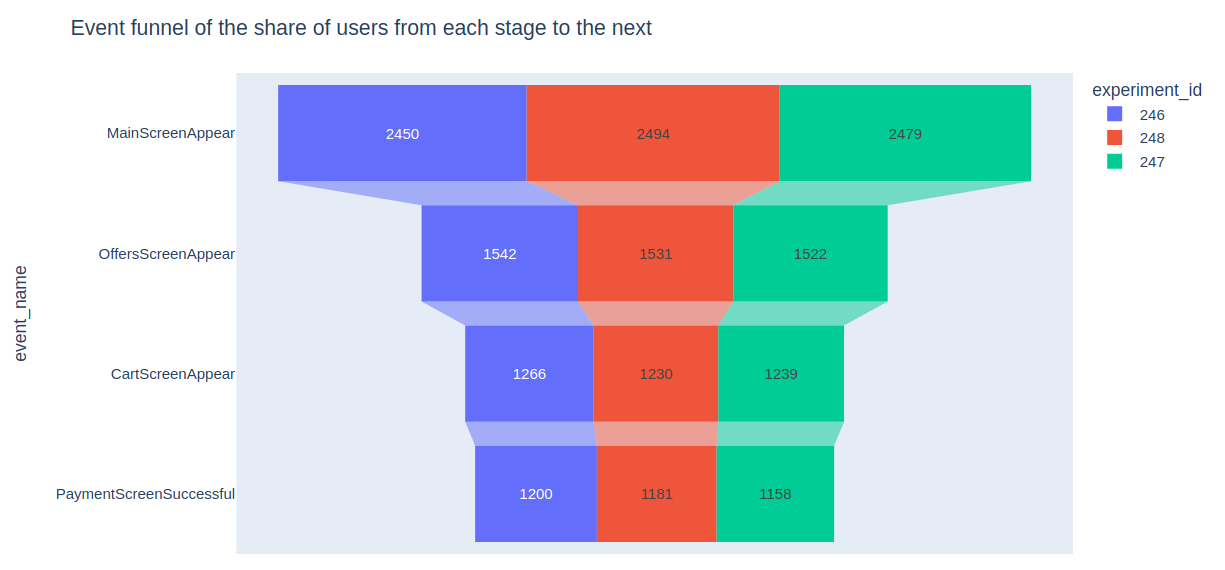

<a name="Step_4.5"></a>
**Step 4. Study the event funnel**  
 
   • At what stage do you lose the most users?  
   
   Back to the table of contents [click here](#table_of_contents)

From the first to the 2 stage we lose most of 3735 to 201, there are 3534 users who no longer participate.
From the payment to the tutorial.

<a name="Step_4.6"></a>
**Step 4. Study the event funnel**  

   • What share of users make the entire journey from their first event to payment? 
   
   Back to the table of contents [click here](#table_of_contents)

The first event is that the user appears on the main screen (MainScreenAppear) and the last is after the other stages that the user is successfully convinced and has understood how he purchases the product. Our last stage is the payment (PaymentScreenSuccessful). To answer the question we now have to see how many users we have at PaymentScreenSuccessful.it is also useful to see how many we lost from the first (MainScreenAppear) to the last (PaymentScreenSuccessful)for the individual experiment_id 246, 247 and 248. Let's subtract the number of the first from the last. The loss of users can have different causes. Reasons for loss could be, for example, not convinced or problems getting to the next step, product too expensive in the eyes of the user (not yet created enough value), etc. To find out the reason we would have to dig deeper. I think it makes sense to do this because it is an important point to know what is holding off potential customers from buying from us. In order to generate more capital here, perhaps through small improvements or bigger if they are worth it.

In [151]:
journey_first=funnel_by_groups[funnel_by_groups['event_name']=='MainScreenAppear'].groupby(['experiment_id'])['user_id'].sum().reset_index()
journey_first

,experiment_id,user_id
0,246,2450
1,247,2479
2,248,2494


In [152]:
journey_last=funnel_by_groups[funnel_by_groups['event_name']=='PaymentScreenSuccessful'].groupby(['experiment_id'])['user_id'].sum().reset_index()
journey_last

,experiment_id,user_id
0,246,1200
1,247,1158
2,248,1181


In [153]:
journey_first_to_last=journey_first.merge(journey_last, on='experiment_id')
journey_first_to_last.rename(columns = {'user_id_x':'MainScreenAppear','user_id_y':'PaymentScreenSuccessful'}, inplace = True)
journey_first_to_last

,experiment_id,MainScreenAppear,PaymentScreenSuccessful
0,246,2450,1200
1,247,2479,1158
2,248,2494,1181


In [154]:
journey_first_to_last['users_we_have_lost']=journey_first_to_last['MainScreenAppear']-journey_first_to_last['PaymentScreenSuccessful']
journey_first_to_last

,experiment_id,MainScreenAppear,PaymentScreenSuccessful,users_we_have_lost
0,246,2450,1200,1250
1,247,2479,1158,1321
2,248,2494,1181,1313


In [155]:
from plotly import graph_objects as go
name_rest = journey_first_to_last['experiment_id']
values = journey_first_to_last['users_we_have_lost']

fig = go.Figure(data=[go.Pie(labels=name_rest, values=values)])
fig.update_layout(title="Users that we have lost the entire journey from their first event to payment")
fig.show() 

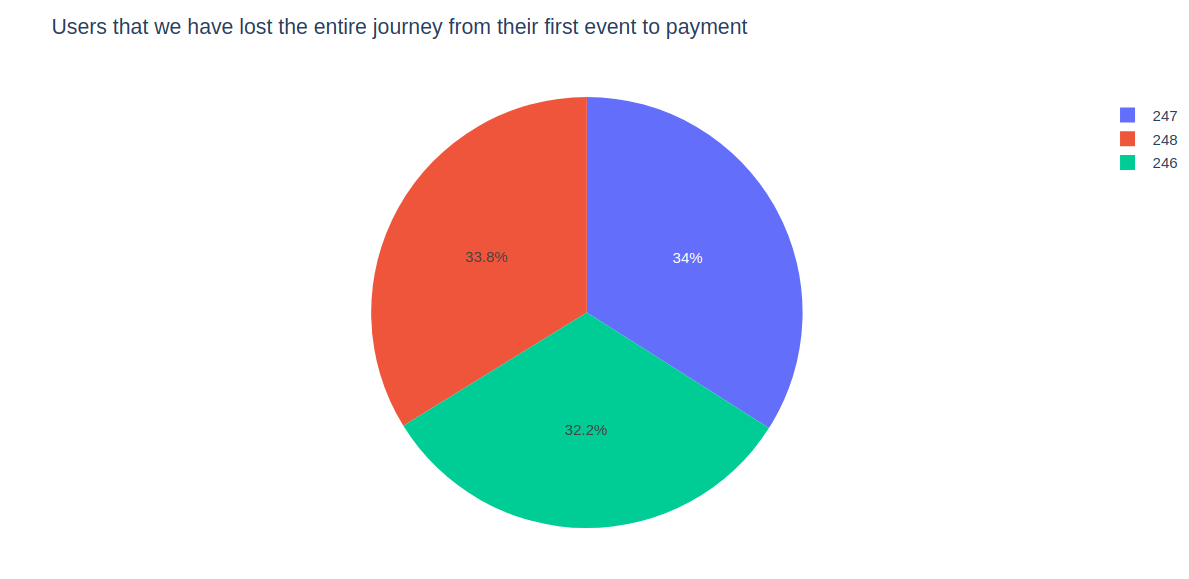

In [156]:
journey_first_to_last

,experiment_id,MainScreenAppear,PaymentScreenSuccessful,users_we_have_lost
0,246,2450,1200,1250
1,247,2479,1158,1321
2,248,2494,1181,1313


In [157]:
new_data = {'Experiment_id': ['246', '247', '248','246', '247', '248','246', '247', '248'],
        'Stage': ['Users_appeared_on_main_screen -','Users_appeared_on_main_screen -',
                  'Users_appeared_on_main_screen -', 'Users_make_entire_journey_until_payment', 
                  'Users_make_entire_journey_until_payment', 'Users_make_entire_journey_until_payment',
                  '= Users_we_have_lost', '= Users_we_have_lost', '= Users_we_have_lost'],
        'User_nomb': [2450, 2476, 2493, 1200, 1158, 1181, 1250, 1318, 1312]}

In [158]:
df_ = pd.DataFrame(new_data)
df_

,Experiment_id,Stage,User_nomb
0,246,Users_appeared_on_main_screen -,2450
1,247,Users_appeared_on_main_screen -,2476
2,248,Users_appeared_on_main_screen -,2493
3,246,Users_make_entire_journey_until_payment,1200
4,247,Users_make_entire_journey_until_payment,1158
5,248,Users_make_entire_journey_until_payment,1181
6,246,= Users_we_have_lost,1250
7,247,= Users_we_have_lost,1318
8,248,= Users_we_have_lost,1312


In [159]:
fig=px.funnel(df_,x='User_nomb',y='Stage', color='Experiment_id')
fig.update_layout(title="Users that we have lost the entire journey from their first event to payment")
fig.show()

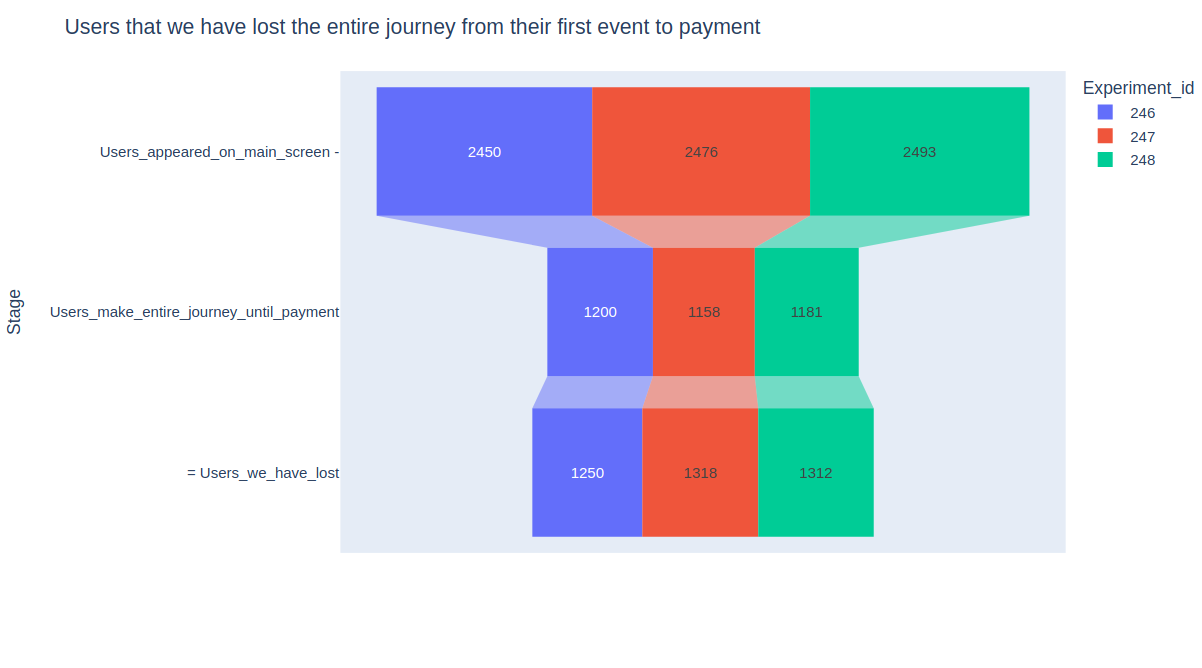

And the answer to the question. What share of users make the entire journey from their first event to payment?

In [160]:
from plotly import graph_objects as go
name_rest = journey_first_to_last['experiment_id']
values = journey_first_to_last['PaymentScreenSuccessful']

fig = go.Figure(data=[go.Pie(labels=name_rest, values=values)])
fig.update_layout(title="Share of users make the entire journey from their first event to payment")
fig.show() 

<a name="Step_5.1"></a>
**Step 5. Study the results of the experiment**  

   • How many users are there in each group? 
   
   Back to the table of contents [click here](#table_of_contents)  

In [161]:
df_filt.groupby('experiment_id')['user_id'].nunique()

experiment_id
246    2484
247    2517
248    2537
Name: user_id, dtype: int64

In [162]:
print('Number of users at CartScreenAppear',users[~users['CartScreenAppear'].isna()].shape[0])

Number of users at CartScreenAppear 3735


In [163]:
print('Number of users at MainScreenAppear',users[~users['MainScreenAppear'].isna()].shape[0])

Number of users at MainScreenAppear 7423


In [164]:
print('Number of users at OffersScreenAppear',users[~users['OffersScreenAppear'].isna()].shape[0])

Number of users at OffersScreenAppear 4595


In [165]:
print('Number of users at PaymentScreenSuccessful',users[~users['PaymentScreenSuccessful'].isna()].shape[0])

Number of users at PaymentScreenSuccessful 3539


In [166]:
print('Number of users at Tutorial',users[~users['Tutorial'].isna()].shape[0])

Number of users at Tutorial 841


<a name="Step_5.2"></a>
**Step 5. Study the results of the experiment**  
   
   • We have two control groups in the A/A test, where we check our mechanisms and calculations. See if there is a statistically significant difference between samples 246 and 247.
   
  Back to the table of contents [click here](#table_of_contents) 

In [167]:
test_samples=df_filt[df_filt['experiment_id']!=248]
test_samples.head()

,event_name,user_id,timestamp,experiment_id,day_of_week
2415,MainScreenAppear,3957232200565023322,2019-08-01 00:00:12,246,Thursday
2416,OffersScreenAppear,3957232200565023322,2019-08-01 00:00:17,246,Thursday
2417,MainScreenAppear,4933689529142781210,2019-08-01 00:00:29,246,Thursday
2419,MainScreenAppear,2011152258955517776,2019-08-01 00:00:42,247,Thursday
2421,OffersScreenAppear,4933689529142781210,2019-08-01 00:01:12,246,Thursday


In [168]:
test_samples_=test_samples.groupby(['event_name','experiment_id'])['user_id'].count().reset_index(name='number_of_users')
test_samples_.head()

,event_name,experiment_id,number_of_users
0,CartScreenAppear,246,14694
1,CartScreenAppear,247,12437
2,MainScreenAppear,246,37780
3,MainScreenAppear,247,39183
4,OffersScreenAppear,246,14793


In [169]:
df_filt.head()

,event_name,user_id,timestamp,experiment_id,day_of_week
2415,MainScreenAppear,3957232200565023322,2019-08-01 00:00:12,246,Thursday
2416,OffersScreenAppear,3957232200565023322,2019-08-01 00:00:17,246,Thursday
2417,MainScreenAppear,4933689529142781210,2019-08-01 00:00:29,246,Thursday
2418,MainScreenAppear,1802682376349807053,2019-08-01 00:00:33,248,Thursday
2419,MainScreenAppear,2011152258955517776,2019-08-01 00:00:42,247,Thursday


In [170]:
test1=df_filt[df_filt.experiment_id==246]['user_id'].unique()
test2=df_filt[df_filt.experiment_id==247]['user_id'].unique()
control=df_filt[df_filt.experiment_id==248]['user_id'].unique()

In [171]:
print(test1)

[3957232200565023322 4933689529142781210 3133982610597594970 ...
 4876403292056911122 6660805781687343085 7823752606740475984]


In [172]:
pivot = df_filt.pivot_table(index='event_name', values='user_id', columns='experiment_id', aggfunc=lambda x: x.nunique()).reset_index()
pivot

experiment_id,event_name,246,247,248
0,CartScreenAppear,1266,1239,1230
1,MainScreenAppear,2450,2479,2494
2,OffersScreenAppear,1542,1522,1531
3,PaymentScreenSuccessful,1200,1158,1181
4,Tutorial,278,283,280


In [173]:
pivot[pivot.event_name=='CartScreenAppear'][246].iloc[0]

1266

In [174]:
df_filt.head(1)

,event_name,user_id,timestamp,experiment_id,day_of_week
2415,MainScreenAppear,3957232200565023322,2019-08-01 00:00:12,246,Thursday


In [175]:
from scipy import stats as st
import numpy as np
import math as mth
def check_hypotesis(group1,group2,event,alpha=0.05):
    success1=pivot[pivot.event_name==event][group1].iloc[0]
    success2=pivot[pivot.event_name==event][group2].iloc[0]
    
    trials1=df_filt[df_filt.experiment_id==group1]['user_id'].nunique()
    trials2=df_filt[df_filt.experiment_id==group2]['user_id'].nunique()
   
    # sugsess proportion in de group:
    p1=success1/trials1
    p2=success2/trials2
    #and in combined dataset:
    p_combined = (success1 + success2) / (trials1 + trials2)
    
    #the difference between the datasets
    difference= p1 - p2
    #calc the statistic in standard deviations of the standart normal distribution
    z_value = difference / mth.sqrt(p_combined *(1 - p_combined) * (1/trials1 +1/trials2))
    
    #setting up the standart normal distribution (mean0, standard deviation 1)
    distr = st.norm(0, 1)   
    #calc the statistic in standard deviations of the standart normal distribution
    p_value =(1 - distr.cdf(abs(z_value))) *2 
    
    print('p-value:', p_value)
    
    if(p_value < alpha):
        print('Reject the null hypotesis for',event, 'and groups', group1, group2)
    else:
        print('Failed to reject the null hypotesit for', event,'and groups', group1, group2)

H0 there is no statistically significant difference the samples from 246 and 247 are the same.  
H1 there is a statistically significant difference between the samples from 246 and 247 the samples are different.

we have and an alfa level of 5%, a deviation from normal if we exceed this 5% we have statistically significant difference. 

In [176]:
check_hypotesis(246,247,'CartScreenAppear',alpha=0.05)

p-value: 0.2182812140633792
Failed to reject the null hypotesit for CartScreenAppear and groups 246 247


This means that there is no statistically significant difference for the groups 246 and 247 for CartScreenAppear

<a name="Step_5.3"></a>
**Step 5. Study the results of the experiment**  
   
   • Select the most popular event. In each of the control groups, find the number of users who performed this action. Find their share. Check whether the difference between the groups is statistically significant. Repeat the procedure for all other events (it will save time if you create a special function for this test). Can you confirm that the groups were split properly? 
   
  Back to the table of contents [click here](#table_of_contents)   

H0 there is no statistically significant difference the samples from 246 and 247 are the same.  
H1 there is a statistically significant difference between the samples from 246 and 247 the samples are different.

In [177]:
for i in pivot.event_name.unique():
    check_hypotesis(246,247,i,alpha=0.05)

p-value: 0.2182812140633792
Failed to reject the null hypotesit for CartScreenAppear and groups 246 247
p-value: 0.6756217702005545
Failed to reject the null hypotesit for MainScreenAppear and groups 246 247
p-value: 0.24301271796804658
Failed to reject the null hypotesit for OffersScreenAppear and groups 246 247
p-value: 0.10298394982948822
Failed to reject the null hypotesit for PaymentScreenSuccessful and groups 246 247
p-value: 0.9536145439962604
Failed to reject the null hypotesit for Tutorial and groups 246 247


It seems that there is no statistically significant difference in any of the events.

<a name="Step_5.4"></a>
**Step 5. Study the results of the experiment**  

   • Do the same thing for the group with altered fonts. Compare the results with those of each of the control groups for each event in isolation. Compare the results with the combined results for the control groups. What conclusions can you draw from the experiment? 
   
   Back to the table of contents [click here](#table_of_contents)  

H0 there is no statistically significant difference the samples from 247 and 248 are the same.  
H1 there is a statistically significant difference between the samples from 247 and 248 the samples are different.

In [178]:
for i in pivot.event_name.unique():
    check_hypotesis(246,248,i,alpha=0.05)

p-value: 0.07842923237520116
Failed to reject the null hypotesit for CartScreenAppear and groups 246 248
p-value: 0.34705881021236484
Failed to reject the null hypotesit for MainScreenAppear and groups 246 248
p-value: 0.20836205402738917
Failed to reject the null hypotesit for OffersScreenAppear and groups 246 248
p-value: 0.2122553275697796
Failed to reject the null hypotesit for PaymentScreenSuccessful and groups 246 248
p-value: 0.861330427953267
Failed to reject the null hypotesit for Tutorial and groups 246 248


It seems that there is no statistically significant difference in any of the events.

In [179]:
for i in pivot.event_name.unique():
    check_hypotesis(247,248,i,alpha=0.05)

p-value: 0.5973544899382834
Failed to reject the null hypotesit for CartScreenAppear and groups 247 248
p-value: 0.6001661582453706
Failed to reject the null hypotesit for MainScreenAppear and groups 247 248
p-value: 0.9293730042460788
Failed to reject the null hypotesit for OffersScreenAppear and groups 247 248
p-value: 0.6982134522789267
Failed to reject the null hypotesit for PaymentScreenSuccessful and groups 247 248
p-value: 0.8151898803603024
Failed to reject the null hypotesit for Tutorial and groups 247 248


In [180]:
pivot[246247] =(pivot[246].iloc[:]+pivot[247].iloc[:])
pivot

experiment_id,event_name,246,247,248,246247
0,CartScreenAppear,1266,1239,1230,2505
1,MainScreenAppear,2450,2479,2494,4929
2,OffersScreenAppear,1542,1522,1531,3064
3,PaymentScreenSuccessful,1200,1158,1181,2358
4,Tutorial,278,283,280,561



   
    
  difference  -> here you take the difference between the two 246247 and 248 to calculate the deviation we need to know the difference
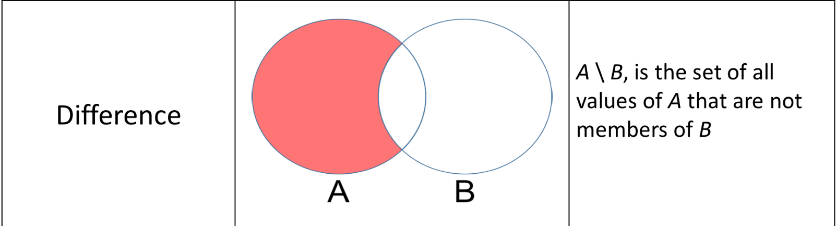   

   mth.sqrt -> gives us the square root of any number returns. Where there is no square root in the formula...but we need it to calculate the standard deviation from the variance.   
       
       (p_combined * (1 - p_combined) - (1 / trials1 + 1 / trials2))   
   
   who we have here. 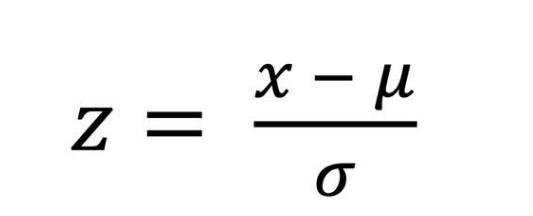
   
   p_combined is our mean
   trials is our x
   

In [181]:
pivot

experiment_id,event_name,246,247,248,246247
0,CartScreenAppear,1266,1239,1230,2505
1,MainScreenAppear,2450,2479,2494,4929
2,OffersScreenAppear,1542,1522,1531,3064
3,PaymentScreenSuccessful,1200,1158,1181,2358
4,Tutorial,278,283,280,561


In [182]:
group1 = 246247
group2 = 248
event = 'CartScreenAppear'
alpha=0.05

success1=pivot[pivot.event_name==event][group1].iloc[0]
success2=pivot[pivot.event_name==event][group2].iloc[0]

trials1=df_filt[df_filt.experiment_id==group1]['user_id'].nunique()
trials2=df_filt[df_filt.experiment_id==group2]['user_id'].nunique()

print('Successes and trials:', success1, success2, trials1, trials2) 
# We got zero value here. That's why the code fails. 
# That happend, because you didn't have 246247 label in your original dataset
# In order to simplify the task, you can calculate trials amount outside the function and pass it like new argumnet
# Some thing like check_hypotesis(group1,group2,event,total_trials_amount, alpha=0.05)

Successes and trials: 2505 1230 0 2537


In [183]:
print('Successes 1 :', success1)
print('Successes 2 :', success2)
print('trials 1 :',trials1, '<------ Error') 
#Since in our df_filt 246 247 and 248 are listed individually, 
#we would also have to calculate 247248 and our df_filt in order not 
#to have 0 in our trivial 1
print('trials 2 :',trials2)

Successes 1 : 2505
Successes 2 : 1230
trials 1 : 0 <------ Error
trials 2 : 2537


In [184]:
df_filt.head()

,event_name,user_id,timestamp,experiment_id,day_of_week
2415,MainScreenAppear,3957232200565023322,2019-08-01 00:00:12,246,Thursday
2416,OffersScreenAppear,3957232200565023322,2019-08-01 00:00:17,246,Thursday
2417,MainScreenAppear,4933689529142781210,2019-08-01 00:00:29,246,Thursday
2418,MainScreenAppear,1802682376349807053,2019-08-01 00:00:33,248,Thursday
2419,MainScreenAppear,2011152258955517776,2019-08-01 00:00:42,247,Thursday


In [185]:
trials1=df_filt[df_filt.experiment_id==246]['user_id'].nunique()+df_filt[df_filt.experiment_id==247]['user_id'].nunique()
trials1

5001

In [186]:
print('Successes 1 :', success1)
print('Successes 2 :', success2)
print('trials 1 :',trials1)
print('trials 2 :',trials2)

Successes 1 : 2505
Successes 2 : 1230
trials 1 : 5001
trials 2 : 2537


In [187]:
   # sugsess proportion in de group:
p1=success1/trials1
p2=success2/trials2
print('p1',p1)
print('p2',p2)
    #and in combined dataset:
p_combined = (success1 + success2) / (trials1 + trials2)
print('p_combined',p_combined)
    #the difference between the datasets
difference= p1 - p2
print('difference',difference)

#calc the statistic in standard deviations of the standart normal distribution
z_value = difference / mth.sqrt(p_combined *(1 - p_combined) * (1/trials1 +1/trials2))
print('z_value',z_value)

#setting up the standart normal distribution (mean0, standard deviation 1)
distr = st.norm(0, 1)   
#calc the statistic in standard deviations of the standart normal distribution
p_value =(1 - distr.cdf(abs(z_value))) *2   

print('p-value:', p_value)

p1 0.5008998200359928
p2 0.48482459597950334
p_combined 0.49548951976651634
difference 0.016075224056489423
z_value 1.3190622651014665
p-value: 0.18714829717090664


In [188]:
    if(p_value < alpha):
        print('Reject the null hypotesis for',event, 'and groups', group1, group2)
    else:
        print('Failed to reject the null hypotesit for', event,'and groups', group1, group2)    

Failed to reject the null hypotesit for CartScreenAppear and groups 246247 248


In [189]:
def check_hypotesis(group1,group2,event,alpha=0.05):
    success1=pivot[pivot.event_name==event][group1].iloc[0]
    success2=pivot[pivot.event_name==event][group2].iloc[0]
    
    trials1=df_filt[df_filt.experiment_id==246]['user_id'].nunique()+df_filt[df_filt.experiment_id==247]['user_id'].nunique()
    trials2=df_filt[df_filt.experiment_id==group2]['user_id'].nunique()
   
    # sugsess proportion in de group:
    p1=success1/trials1
    p2=success2/trials2
    #and in combined dataset:
    p_combined = (success1 + success2) / (trials1 + trials2)
    
    #the difference between the datasets
    difference= p1 - p2
    #calc the statistic in standard deviations of the standart normal distribution
    z_value = difference / mth.sqrt(p_combined *(1 - p_combined) * (1/trials1 +1/trials2))
    
    #setting up the standart normal distribution (mean0, standard deviation 1)
    distr = st.norm(0, 1)   
    #calc the statistic in standard deviations of the standart normal distribution
    p_value =(1 - distr.cdf(abs(z_value))) *2 
    
    print('p-value:', p_value)
    
    if(p_value < alpha):
        print('Reject the null hypotesis for',event, 'and groups', group1, group2)
    else:
        print('Failed to reject the null hypotesit for', event,'and groups', group1, group2)

In [190]:
for i in pivot.event_name.unique():
    check_hypotesis(246247,248,i,alpha=0.05)

p-value: 0.18714829717090664
Failed to reject the null hypotesit for CartScreenAppear and groups 246247 248
p-value: 0.39298914928006035
Failed to reject the null hypotesit for MainScreenAppear and groups 246247 248
p-value: 0.4386768167991866
Failed to reject the null hypotesit for OffersScreenAppear and groups 246247 248
p-value: 0.6221237660987535
Failed to reject the null hypotesit for PaymentScreenSuccessful and groups 246247 248
p-value: 0.813440015718357
Failed to reject the null hypotesit for Tutorial and groups 246247 248


**Conclusion**

Here, too, we failed to reject our H 0, which means there is no significant difference between 246+ 247 = (246247) and / 248. Our H1 that there is a significant difference between the groups, so that the two are not the same failed.

<a name="Step_5.5"></a>
**Step 5. Study the results of the experiment**  
    
   • What significance level have you set to test the statistical hypotheses mentioned above? Calculate how many statistical hypothesis tests you carried out. With a statistical significance level of 0.1, one in 10 results could be false. What should the significance level be? If you want to change it, run through the previous steps again and check your conclusions.
   
  Back to the table of contents [click here](#table_of_contents)   

Since we have tested the hypotheses several times, we know that the Family Wise Error Rate (actually probability and not a rate) should be taken into account. We tested the ratio of the two experiments 246 & 247 based on the number of individual event groups. We also tested the same for experiments 247 & 248 on the 5 groups. with an alpha value of 0.05 i.e. a probability of 5% that the result does not correspond to what we hypothesize. The more often we test a hypotesis with the same values, it is important that this also increases the probability that we will find one significant difference bump because our fixed alpha adds up with each test.
In numbers it would mean for us in the first test 1 for 100% -0.95 for our 95% probability that we are correct = 0.05 so 5% that we are not correct. But since we repeat the test 5 times, our calculation looks like this. 1 (100%) - 0.95^5 = 0.226 thus our alpha has increased our probability of making a mistake in our hypotesis. If we know that we will test our hypotesis several times and we can also calculate our alpha for the number of tests so that in the end we get our alpha of 0.05 for test. To calculate our threshold, we divide our desired FWER, for example 0.05 (5%), by the number of hypotesis tests in our case 5. So 0.05 / 5 = 0.01 we would have to set our alpha aso to 0.01 in order to receive a FWER of 0.05 for several tests. 

**Overall conclusion**  

We have been able to draw some useful information from the analysis that we can now further develop in order to be able to draw further conclusions and what must be observed in order to avoid or correct old errors. Which include, among other things, lost data as well as large losses of users and results of our hypotesis test. 
In the hypotesis test we could see that there were no statistically significant differences between the groups. 
With the funnels, we could see that, despite this statistically insignificant difference, there was a group that could not see any statistically significant differences through the funnel that we in all groups of Main Screen Appear to the next stuffed a huge loss of users and, in the case of Payment Screen Success, also had a huge loss of users. With our histogram we were able to determine that we were missing a large amount of data before January 8th, 2019 and that if the date is left out, there is only a small amount of 1.159% of data that we lose. We also looked at the order of events with the users.